In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [3]:
df_log = pd.read_csv("data_for_logistic_high_performance_model.csv")
df_log.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7,churn
0,0.0,0.0,0.0,1069.180,1349.850,1519.213488,57.84,54.68,52.29,453.43,...,-1.0,-1.0,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1
1,0.0,0.0,0.0,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,...,1.0,1.0,315.0,21.03,910.65,122.16,437.0,603.0,520.0,0
2,0.0,0.0,0.0,492.846,205.671,593.260000,501.76,108.39,534.24,413.31,...,-1.0,1.0,2607.0,0.00,0.00,0.00,507.0,253.0,380.0,0
3,0.0,0.0,0.0,430.975,299.869,187.894000,50.51,74.01,70.61,296.29,...,-1.0,-1.0,511.0,0.00,2.45,21.89,570.0,348.0,459.0,0
4,0.0,0.0,0.0,690.008,18.980,25.499000,1185.91,9.28,7.79,61.64,...,-1.0,-1.0,667.0,0.00,0.00,0.00,816.0,0.0,408.0,0


In [4]:
df_log.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 158 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   loc_og_t2o_mou          float64
 1   std_og_t2o_mou          float64
 2   loc_ic_t2o_mou          float64
 3   arpu_6                  float64
 4   arpu_7                  float64
 5   arpu_8                  float64
 6   onnet_mou_6             float64
 7   onnet_mou_7             float64
 8   onnet_mou_8             float64
 9   offnet_mou_6            float64
 10  offnet_mou_7            float64
 11  offnet_mou_8            float64
 12  roam_ic_mou_6           float64
 13  roam_ic_mou_7           float64
 14  roam_ic_mou_8           float64
 15  roam_og_mou_6           float64
 16  roam_og_mou_7           float64
 17  roam_og_mou_8           float64
 18  loc_og_t2t_mou_6        float64
 19  loc_og_t2t_mou_7        float64
 20  loc_og_t2t_mou_8        float64
 21  loc_og_t2m_mou_6        float64
 2

In [5]:
obj_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8',
                            'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'
                           ]
df_log[obj_cols] = df_log[obj_cols].astype('object')
df_log[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fb_user_6         30019 non-null  object
 1   fb_user_7         30019 non-null  object
 2   fb_user_8         30019 non-null  object
 3   night_pck_user_6  30019 non-null  object
 4   night_pck_user_7  30019 non-null  object
 5   night_pck_user_8  30019 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


## train test split

In [6]:
X_log = df_log.drop('churn', axis = 1)
y_log = df_log['churn']

## Scaling

In [7]:
num_cols = X_log.select_dtypes(include = ['int64','float64']).columns
print("Total count of numerical columns: {}".format(len(num_cols)))

Total count of numerical columns: 151


In [8]:
scaler = StandardScaler()
X_log[num_cols] = scaler.fit_transform(X_log[num_cols])

In [9]:
X_log.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_monthly_recharge_6,tot_monthly_recharge_7,average_recharge_6_7
0,0.0,0.0,0.0,1.636538,2.510202,2.917916,-0.632765,-0.638199,-0.582044,0.183719,...,-1,-1,-1,-0.474119,-0.182020,-0.345100,-0.325309,2.459186,0.303607,1.619414
1,0.0,0.0,0.0,-0.621115,-0.254252,-1.102039,0.447605,0.226780,-0.636276,-0.848816,...,-1,1,1,-0.990277,-0.336839,3.261082,0.130323,-0.647940,-0.188103,-0.502097
2,0.0,0.0,0.0,-0.247950,-1.177916,0.224218,0.714988,-0.481432,0.936688,0.068254,...,-1,-1,1,1.438951,-0.425530,-0.423514,-0.407870,-0.457652,-1.108415,-0.948731
3,0.0,0.0,0.0,-0.450255,-0.874281,-0.955036,-0.655019,-0.581779,-0.524313,-0.268528,...,-1,-1,-1,-0.782542,-0.425530,-0.413601,-0.311431,-0.286393,-0.858616,-0.696702
4,0.0,0.0,0.0,0.396727,-1.779691,-1.427460,2.792086,-0.770712,-0.722273,-0.943847,...,-1,-1,-1,-0.617202,-0.425530,-0.423514,-0.407870,0.382332,-1.773670,-0.859404


## PCA

In [10]:
pca = PCA(random_state = 100)
pca_data = pca.fit(X_log)

In [12]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

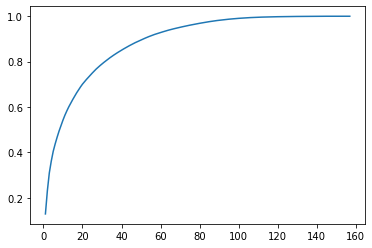

In [13]:
plt.plot(range(1, len(var_cumu)+1), var_cumu)

In [21]:
pca2 = PCA(0.90)
pca2_data = pca2.fit_transform(X_log)

In [23]:
pca2_data.shape

(30019, 52)

In [24]:
pca3 = PCA(0.95)
pca3_data = pca3.fit_transform(X_log)

In [25]:
pca3_data.shape

(30019, 70)

#### Assigning X_log with pca data

In [26]:
X_log = pd.DataFrame(pca3_data)
X_log.shape

(30019, 70)

In [27]:
X_log.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,4.848884,7.708640,-1.538871,-6.138307,6.707642,-1.895321,-0.071635,3.484130,5.652522,1.378470,...,0.658475,0.114465,-1.261185,1.489114,-2.227306,-0.524190,-0.609610,-1.789933,0.039509,-0.953834
1,-0.868207,-4.029816,-0.130091,2.924715,-0.761529,0.643027,-0.488949,0.806977,0.020100,-0.423299,...,0.002142,1.076416,-0.405117,-0.108846,-0.012564,-0.158647,0.761103,0.661591,-0.888201,0.177578
2,-0.570567,2.941774,0.835671,-1.163843,10.624948,2.129281,1.349088,0.884376,0.572773,5.167166,...,0.682076,0.240198,-2.027697,-0.859467,-0.838989,-0.378317,-0.929591,0.974327,-0.073767,0.610870
3,-1.879399,0.264488,-3.440286,-1.124842,2.480123,0.628095,0.785440,-0.915207,-1.127319,-0.134863,...,-0.336662,-0.065181,0.532011,0.042286,-0.234792,0.531532,0.917273,-0.934947,1.114756,0.856654
4,-5.538939,-3.094460,-2.044200,-0.396908,-1.086869,1.447875,3.892854,0.096753,0.682211,-0.711671,...,0.268118,-0.072747,0.201801,0.282398,0.234505,-0.324621,-0.294928,-0.013934,0.098471,0.034367


In [28]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, train_size=0.7, random_state=100)
print(X_train_log.shape)
print(y_train_log.shape)
print(X_test_log.shape)
print(y_test_log.shape)

(21013, 70)
(21013,)
(9006, 70)
(9006,)


In [82]:
type(y_train_log)

pandas.core.series.Series

In [30]:
# Logistic regression model
logm1 = sm.GLM(y_train_log,(sm.add_constant(X_train_log)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21013
Model:                            GLM   Df Residuals:                    20942
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3975.3
Date:                Sun, 30 Aug 2020   Deviance:                       7950.7
Time:                        12:38:44   Pearson chi2:                 1.90e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0909      0.140    -29.282      0.000      -4.365      -3.817
0             -0.3148      0.018    -17.850      0.000      -0.349      -0.280
1             -0.2165      0.017    -12.579      0.000      -0.250      -0.183
2             -0.0288      0.013     -2.234      0.025      -0.054      -0.004
3             -0.1236      0.022     -5.547      0.000      -0.167      -0.080
4             -0.1000      0.025     -3.988      0.000      -0.149      -0.051
5             -0.0824      0.019     -4.333      0.000      -0.120      -0.045
6              0.5470      0.017     31.324      0.000       0.513       0.581
7              0.0813      0.018      4.450      0.000       0.046       0.117
8             -0.1254      0.037     -3.364      0.001      -0.198      -0.052
9             -0.0334      0.052     -0.647      0.518      -0.135       0.068
10            -0.0125      0.029     -0.433      0.665      -0.069       0.044
11            -0.0493      0.036     -1.385      0.166      -0.119       0.020
12            -0.1690      0.071     -2.393      0.017      -0.307      -0.031
13            -0.1992      0.082     -2.425      0.015      -0.360      -0.038
14            -0.4675      0.039    -11.879      0.000      -0.545      -0.390
15            -0.2121      0.037     -5.753      0.000      -0.284      -0.140
16            -0.1020      0.073     -1.389      0.165      -0.246       0.042
17            -0.1875      0.037     -5.022      0.000      -0.261      -0.114
18            -0.1836      0.078     -2.347      0.019      -0.337      -0.030
19            -0.0132      0.033     -0.402      0.688      -0.078       0.051
20            -1.0164      0.410     -2.480      0.013      -1.819      -0.213
21            -2.9055      1.294     -2.245      0.025      -5.442      -0.369
22            -1.1376      0.609     -1.867      0.062      -2.332       0.057
23             0.1879      0.101      1.856      0.063      -0.011       0.386
24            -0.8281      0.429     -1.930      0.054      -1.669       0.013
25             0.3085      0.065      4.773      0.000       0.182       0.435
26            -0.0711      0.070     -1.010      0.313      -0.209       0.067
27            -0.3118      0.174     -1.796      0.072      -0.652       0.028
28             0.6020      0.243      2.479      0.013       0.126       1.078
29             0.1453      0.087      1.662      0.097      -0.026       0.317
30             0.0302      0.075      0.403      0.687      -0.117       0.177
31             0.0708      0.044      1.613      0.107      -0.015       0.157
32             0.0241      0.058      0.416      0.678      -0.090       0.138
33            -0.0004      0.042     -0.011      0.992      -0.083       0.082
34             0.0455      0.090      0.503      0.615      -0.132       0.223
35

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [33]:
log = LogisticRegression()
rfe = RFE(log, 25)
rfe = rfe.fit(X_train_log, y_train_log)

C:\Users\Naga Satya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [36]:
cols = X_train_log.columns[rfe.support_]
print(cols)

Int64Index([ 0,  1,  6, 14, 15, 16, 17, 20, 21, 25, 28, 34, 37, 38, 43, 47, 48,
            50, 51, 52, 54, 56, 57, 58, 66],
           dtype='int64')


In [37]:
X_train_log_sm = sm.add_constant(X_train_log[cols])
log2 = sm.GLM(y_train_log, X_train_log_sm, family = sm.families.Binomial())
model2 = log2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21013
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4118.9
Date:                Sun, 30 Aug 2020   Deviance:                       8237.8
Time:                        12:46:28   Pearson chi2:                 6.73e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7330      0.057    -65.591      0.000      -3.845      -3.621
0             -0.2893      0.011    -26.444      0.000      -0.311      -0.268
1             -0.2043      0.012    -17.689      0.000      -0.227      -0.182
6              0.5315      0.014     38.490      0.000       0.504       0.559
14            -0.4265      0.023    -18.897      0.000      -0.471      -0.382
15            -0.1289      0.025     -5.187      0.000      -0.178      -0.080
16            -0.1880      0.024     -7.981      0.000      -0.234      -0.142
17            -0.1435      0.022     -6.550      0.000      -0.186      -0.101
20            -0.2249      0.033     -6.770      0.000      -0.290      -0.160
21            -0.3959      0.056     -7.083      0.000      -0.505      -0.286
25             0.2298      0.025      9.024      0.000       0.180       0.280
28             0.1442      0.034      4.272      0.000       0.078       0.210
34             0.1534      0.033      4.677      0.000       0.089       0.218
37            -0.2252      0.033     -6.910      0.000      -0.289      -0.161
38            -0.2209      0.037     -5.973      0.000      -0.293      -0.148
43             0.1488      0.046      3.238      0.001       0.059       0.239
47            -0.3106      0.055     -5.635      0.000      -0.419      -0.203
48             0.2717      0.060      4.500      0.000       0.153       0.390
50            -0.3485      0.044     -7.924      0.000      -0.435      -0.262
51             0.1697      0.045      3.771      0.000       0.082       0.258
52             0.2225      0.043      5.234      0.000       0.139       0.306
54            -0.2369      0.047     -5.018      0.000      -0.329      -0.144
56            -0.1708      0.045     -3.790      0.000      -0.259      -0.082
57             0.1477      0.050      2.974      0.003       0.050       0.245
58            -0.1339      0.052     -2.592      0.010      -0.235      -0.033
66            -0.1710      0.054     -3.168      0.002      -0.277      -0.065
==============================================================================
"""

In [39]:
# Getting the predicted probabilities
y_train_log_pred = model2.predict(X_train_log_sm)
y_train_log_pred[:7]

12122    0.011996
18659    0.058432
5658     0.167903
1434     0.420265
4636     0.549646
16841    0.008602
29995    0.012482
dtype: float64

In [40]:
y_train_log_pred = y_train_log_pred.values.reshape(-1)
y_train_log_pred[:7]

array([0.0119962 , 0.05843186, 0.16790275, 0.42026527, 0.54964605,
       0.00860176, 0.01248236])

In [41]:
y_train_log_df = pd.DataFrame({'Churn': y_train_log.values, 'Churn_probability':y_train_log_pred})
y_train_log_df.head()

,Churn,Churn_probability
0,0,0.011996
1,0,0.058432
2,0,0.167903
3,1,0.420265
4,1,0.549646


#### Generating the new churn column based on threshold limit

In [43]:
y_train_log_df['Predicted'] = y_train_log_df['Churn_probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_log_df.head()

,Churn,Churn_probability,Predicted
0,0,0.011996,0
1,0,0.058432,0
2,0,0.167903,0
3,1,0.420265,0
4,1,0.549646,1


In [44]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_log_df['Churn'], y_train_log_df['Predicted'])
confusion_matrix

array([[18937,   285],
       [ 1320,   471]], dtype=int64)

In [45]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_log_df['Churn'], y_train_log_df['Predicted']))

0.923618712225765


In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_log[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_log[cols].values, i) for i in range(X_train_log[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,0,1.0
13,38,1.0
23,58,1.0
22,57,1.0
21,56,1.0
20,54,1.0
19,52,1.0
18,51,1.0
17,50,1.0
16,48,1.0


- VIF values are good to go along with the p values in the summary

In [48]:
# metrics beyond accuracy
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.2629815745393635

In [50]:
# Let us calculate specificity
TN / float(TN+FP)

0.9851732389969826

In [51]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.014826761003017375


In [52]:
# positive predictive value 
print (TP / float(TP+FP))

0.623015873015873


## Finding the optimal cut-off point

#### Based on the tradeoff between the sensitivity, specificity

In [55]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_log_df[i]= y_train_log_df['Churn_probability'].map(lambda x: 1 if x > i else 0)
y_train_log_df.head()

,Churn,Churn_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011996,0,1,0,0,0,0,0,0,0,0,0
1,0,0.058432,0,1,0,0,0,0,0,0,0,0,0
2,0,0.167903,0,1,1,0,0,0,0,0,0,0,0
3,1,0.420265,0,1,1,1,1,1,0,0,0,0,0
4,1,0.549646,1,1,1,1,1,1,1,0,0,0,0


In [56]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_log_df.Churn, y_train_log_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085233  1.000000  0.000000
0.1   0.1  0.833056  0.797320  0.836385
0.2   0.2  0.904630  0.686767  0.924930
0.3   0.3  0.921905  0.568398  0.954843
0.4   0.4  0.926522  0.427694  0.973000
0.5   0.5  0.923619  0.262982  0.985173
0.6   0.6  0.920716  0.144612  0.993029
0.7   0.7  0.918193  0.074819  0.996775
0.8   0.8  0.916385  0.030709  0.998908
0.9   0.9  0.915100  0.005025  0.999896


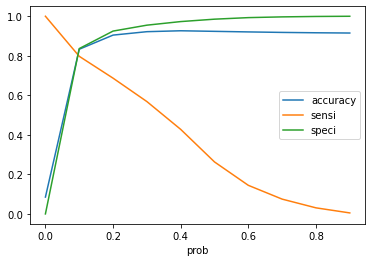

In [57]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [59]:
y_train_log_df['final_predicted'] = y_train_log_df.Churn_probability.map( lambda x: 1 if x > 0.1 else 0)

y_train_log_df.head()

,Churn,Churn_probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011996,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.058432,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.167903,0,1,1,0,0,0,0,0,0,0,0,1
3,1,0.420265,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.549646,1,1,1,1,1,1,1,0,0,0,0,1


In [60]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_log_df.Churn, y_train_log_df.final_predicted)

0.8330557274068434

In [61]:
confusion_matrix_2 = metrics.confusion_matrix(y_train_log_df.Churn, y_train_log_df.final_predicted )
confusion_matrix_2

array([[16077,  3145],
       [  363,  1428]], dtype=int64)

In [63]:
TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7973199329983249

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.8363853917386328

### Precision and recall for the model

In [68]:
confusion = metrics.confusion_matrix(y_train_log_df.Churn, y_train_log_df.Predicted )
confusion

array([[18937,   285],
       [ 1320,   471]], dtype=int64)

#### Precision

In [69]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.623015873015873

#### Recall

In [70]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2629815745393635

### Precision & recall tradeoff

In [71]:
from sklearn.metrics import precision_recall_curve

In [72]:
y_train_log_df.Churn, y_train_log_df.Predicted

(0        0
 1        0
 2        0
 3        1
 4        1
         ..
 21008    0
 21009    0
 21010    1
 21011    0
 21012    0
 Name: Churn, Length: 21013, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 21008    0
 21009    0
 21010    0
 21011    0
 21012    0
 Name: Predicted, Length: 21013, dtype: int64)

In [74]:
p, r, thresholds = precision_recall_curve(y_train_log_df.Churn, y_train_log_df.Churn_probability)

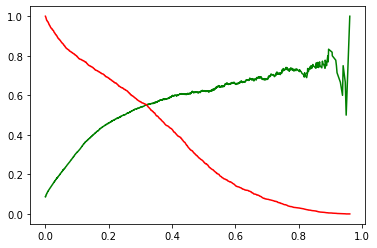

In [75]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [78]:
X_test_log_sm = sm.add_constant(X_test_log)